📊 About the Dataset
This dataset explores the influence of AI-generated content across various industries, including journalism, social media, entertainment, and marketing. It provides insights into public sentiment, engagement trends, economic impact, and regulatory responses over time.

With AI-generated content becoming increasingly prevalent, this dataset serves as a valuable resource for data analysts, business strategists, and machine learning researchers to study trends, detect biases, and predict future AI adoption patterns.

link :- https://www.kaggle.com/datasets/atharvasoundankar/impact-of-ai-on-digital-media-2020-2025/data

In [1]:
#import necesarry library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset /content/Global_AI_Content_Impact_Dataset.csv
df = pd.read_csv('/content/Global_AI_Content_Impact_Dataset.csv')
df.head()

,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40.77,18.73
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35.67,35.02
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54.47,22.76
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,Moderate,51.84,1.93
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,Strict,41.77,21.41


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     200 non-null    object 
 1   Year                                        200 non-null    int64  
 2   Industry                                    200 non-null    object 
 3   AI Adoption Rate (%)                        200 non-null    float64
 4   AI-Generated Content Volume (TBs per year)  200 non-null    float64
 5   Job Loss Due to AI (%)                      200 non-null    float64
 6   Revenue Increase Due to AI (%)              200 non-null    float64
 7   Human-AI Collaboration Rate (%)             200 non-null    float64
 8   Top AI Tools Used                           200 non-null    object 
 9   Regulation Status                           200 non-null    object 
 10  Consumer Trust

no null value in this dataset

In [4]:
#check unique value of all column
for col in df.columns:
  print(f'{col} : {df[col].unique()}')

Country : ['South Korea' 'China' 'USA' 'France' 'Australia' 'UK' 'Canada' 'India'
 'Japan' 'Germany']
Year : [2022 2025 2021 2023 2020 2024]
Industry : ['Media' 'Legal' 'Automotive' 'Gaming' 'Retail' 'Education' 'Healthcare'
 'Marketing' 'Manufacturing' 'Finance']
AI Adoption Rate (%) : [44.29 34.75 81.06 85.24 78.95 66.95 68.23 91.27 17.02 25.5  11.94 39.04
 71.   25.62 49.71 67.94 43.85 64.87 62.98 62.94 94.76 44.1  12.86 49.97
 88.41 79.59 26.12 87.95 42.53 32.74 67.15 28.48 44.97 71.57 16.79 74.81
 77.52 27.61 44.61 81.18 41.28 48.54 62.64 57.35 26.63 25.98 20.47 83.4
 61.49 89.96 33.23 30.94 91.41 93.   93.16 26.27 88.75 50.27 76.22 28.27
 41.32 38.42 20.25 68.39 68.21 44.99 50.34 45.27 66.93 78.21 83.2  12.97
 70.7  78.6  43.55 82.82 75.42 13.9  82.72 63.04 72.88 26.57 80.83 73.22
 45.3  89.74 55.3  87.73 71.9  88.38 67.18 28.6  46.72 35.91 27.95 33.2
 38.21 43.4  67.97 92.96 18.91 70.59 83.74 52.43 32.   43.12 27.02 29.49
 57.15 35.83 27.5  49.72 79.64 53.76 91.67 27.53 67.08 77

# EDA
##  1. AI Adoption by Industry
##  2. Revenue Increase vs Job Loss due to AI
##  3. Country-wise Market Share
##  4. Top AI Tools Used with Regulation


In [5]:
# Ai adoption by industry

#grop data by industry
industry_adoption = df.groupby('Industry')['AI Adoption Rate (%)'].sum().reset_index()

#sort value
industry_adoption = industry_adoption.sort_values(by='AI Adoption Rate (%)', ascending=False)

#plot bar chart using plotly top 3 industry with diifernt colour show other also but same colour
import plotly.express as px
colors = ['#FF5733', '#33FF57', '#3377FF']
fig = px.bar(industry_adoption, x='Industry', y='AI Adoption Rate (%)', color='Industry',
             color_discrete_sequence=colors[:3] + ['#AAAAAA'] * (len(industry_adoption) - 3))

fig.update_layout(title='AI Adoption by Industry',
                  xaxis_title='Industry',
                  yaxis_title='AI Adoption Rate (%)',
                  showlegend=False)
fig.show()

insights → top 3 industry has highly show adoption rate ascompare to others . there are three industry in top 3 is  Gaming,media,Automotive

In [6]:
# Revenue Increase vs Job Loss due to AI
# scatter plot plotly
fig2 = px.scatter(df,
                  x='Job Loss Due to AI (%)',
                  y='Revenue Increase Due to AI (%)',
                  color='Industry',
                  size='AI Adoption Rate (%)',
                  hover_data=['Country', 'Year'],
                  title='Revenue Increase vs Job Loss due to AI')
fig2.update_layout(xaxis_title='Job Loss Due to AI (%)', yaxis_title='Revenue Increase Due to AI (%)')

In [7]:
#heat map of both
df_corr = df[['AI Adoption Rate (%)', 'Job Loss Due to AI (%)', 'Revenue Increase Due to AI (%)']].corr()

In [8]:
df_corr

,AI Adoption Rate (%),Job Loss Due to AI (%),Revenue Increase Due to AI (%)
AI Adoption Rate (%),1.000000,-0.004589,0.001883
Job Loss Due to AI (%),-0.004589,1.000000,0.152893
Revenue Increase Due to AI (%),0.001883,0.152893,1.000000


insightas → no relation ship beteen job loass,ai adoption and revenue
- heathcare industry and education show from scatter plot less job loss with moderate revenue means AI is enhancing not replacing human jobs in these fields
- many industry like gaming,media,automative show high revenue with moderate job loss around (30%) thats means partial AI adoption boosts productivity and revenue without mass layoffs

In [9]:
#  Country-wise Market Share
# bar chart Market Share of AI Companies (%) vs country
fig3 = px.bar(df.groupby('Country')['Market Share of AI Companies (%)'].mean().reset_index(),
              x='Country',
              y='Market Share of AI Companies (%)',
              color='Market Share of AI Companies (%)',
              title='Market Share of AI Companies (%) vs Country')
fig3.update_layout(xaxis_title='Country', yaxis_title='Market Share of AI Companies (%)')
fig3.show()

insights → with higest market share leading contry is Germany(30.45%),other contry is canada(28.27%) and india(28.33%) market share of ai company

In [10]:
# Top AI Tools Used with Regulation
fig4 = px.histogram(df,
                    x='Top AI Tools Used',
                    color='Regulation Status',
                    title='Top AI Tools Used by Regulation Status')
fig4.update_layout(xaxis_title='AI Tool', yaxis_title='Count')
fig4.show()

insights →  ChatGPT and midjourney are most used across all regulation types.

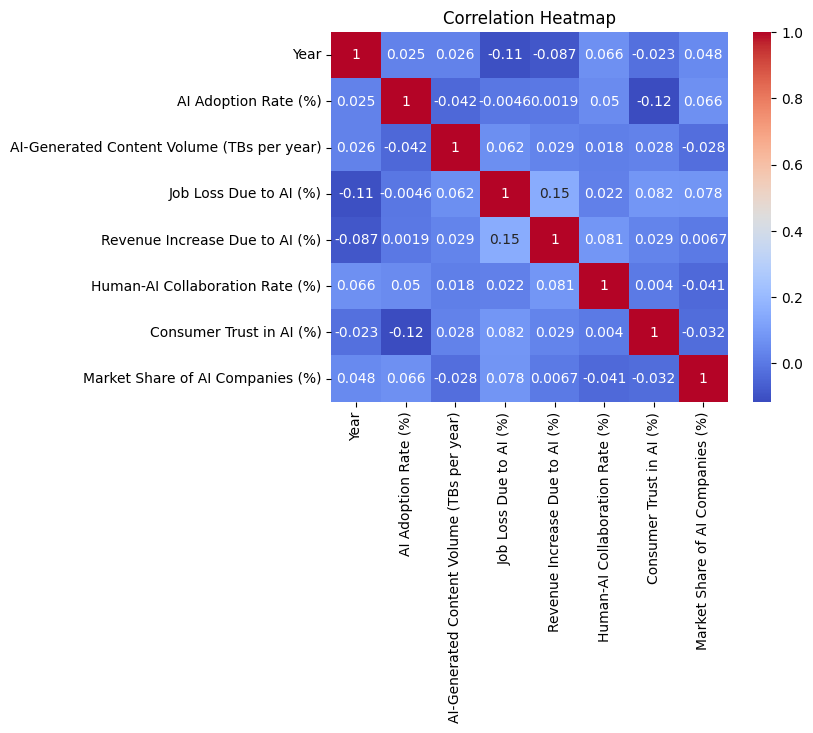

In [11]:
#check overall co relation using heat map
df_num = (df.drop(['Country', 'Industry','Top AI Tools Used','Regulation Status'], axis=1))

# heat map
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

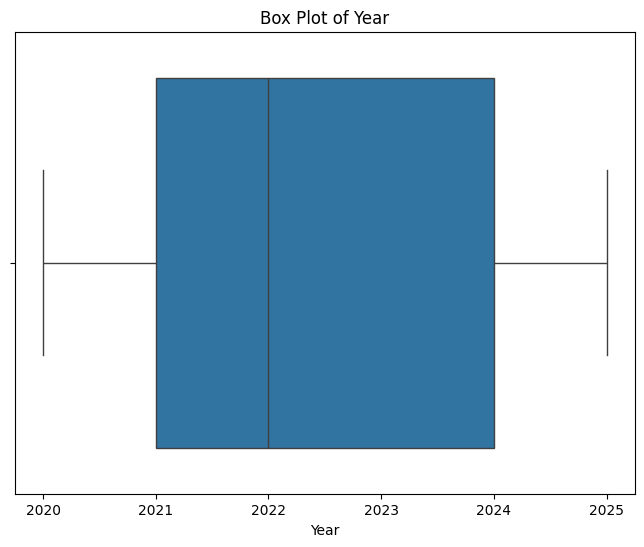

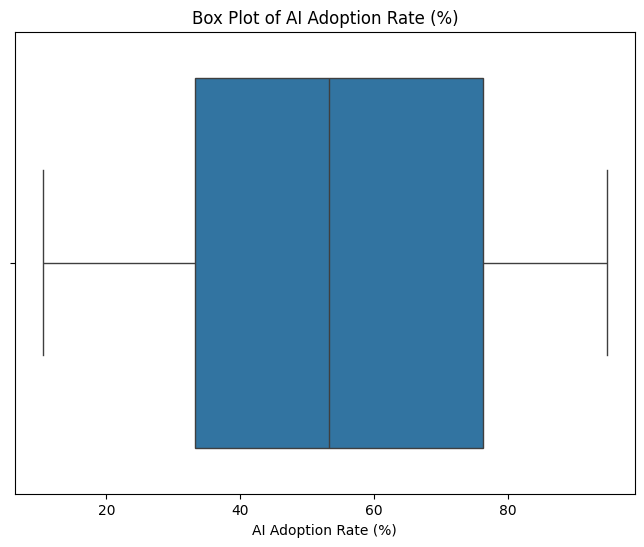

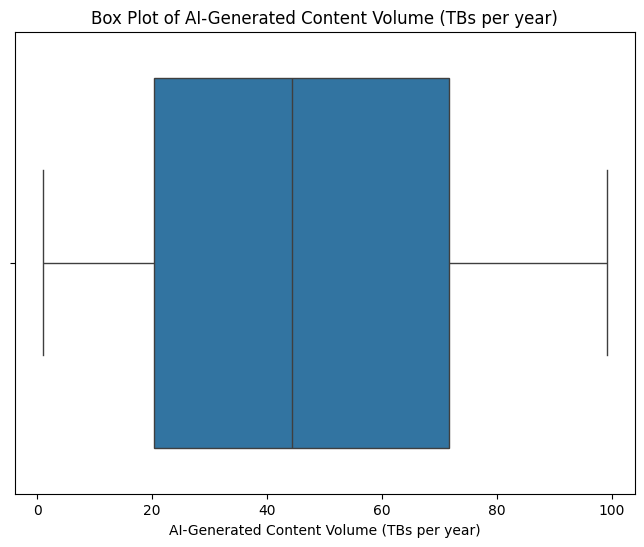

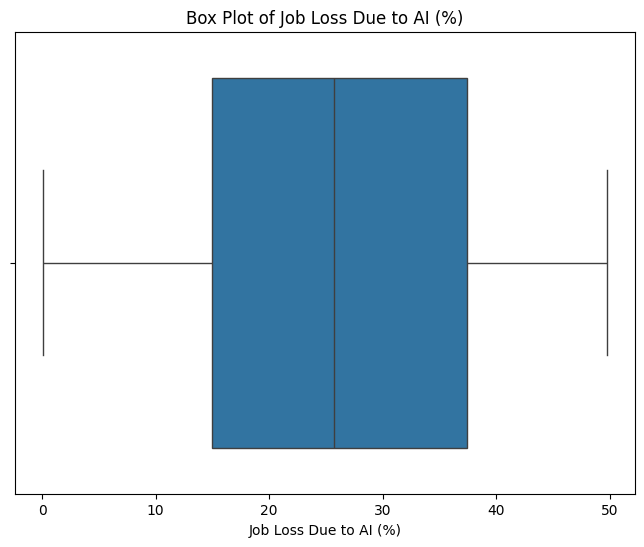

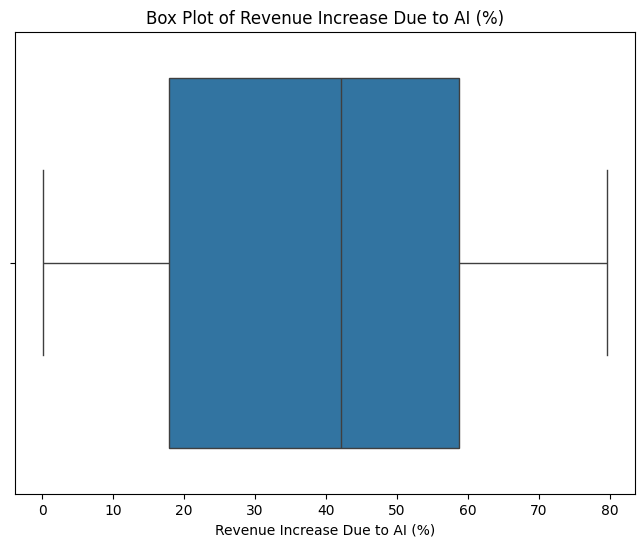

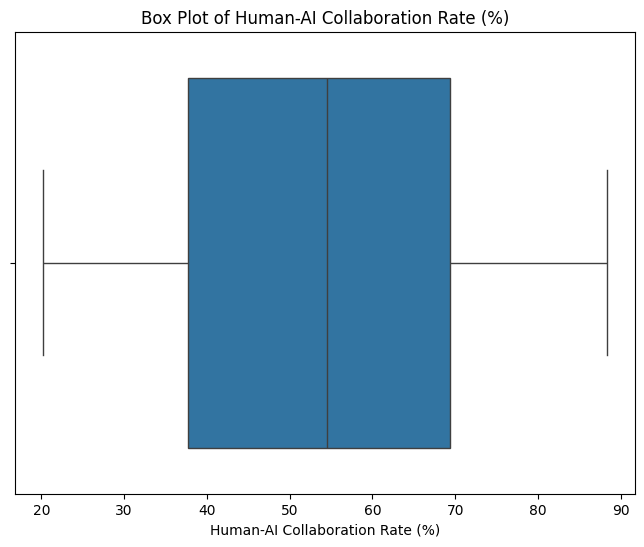

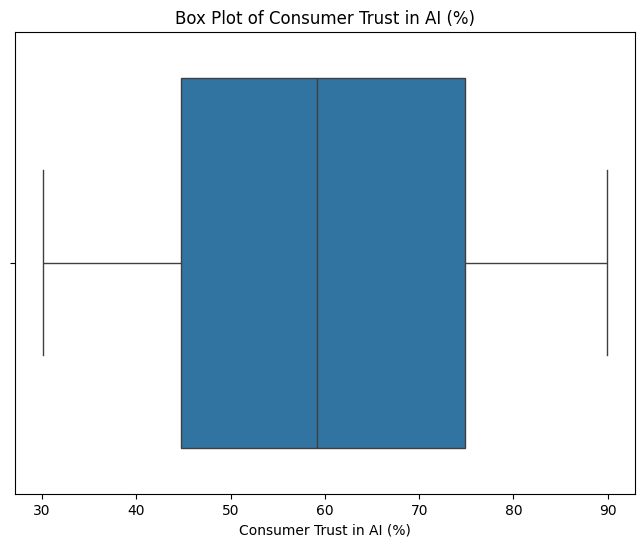

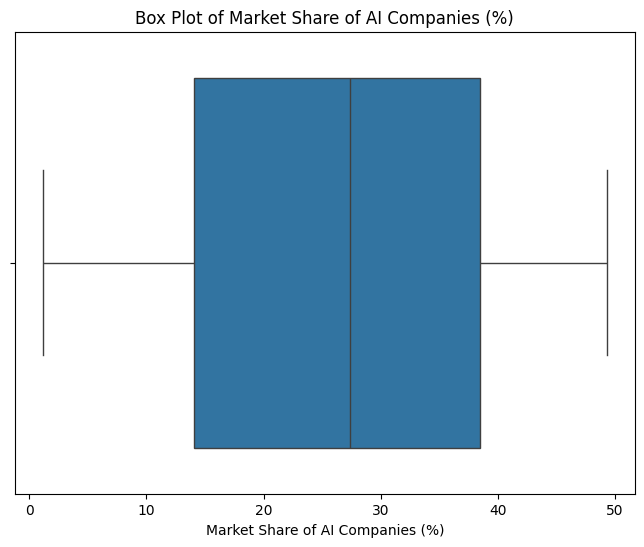

In [12]:
#outlier all column wirh box plot defining function to each column with respect to bot plot
def box_plot(df):
    for col in df.select_dtypes(include=np.number).columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col}')
        plt.show()
box_plot(df)


→ this dataset contain no outlier

#next interactive dasborad with power bi